<div style="direction:rtl; text-align:right">

# المشروع الثاني: كم دراجة هوائية سيتم استئجارها خلال الشهر القادم ؟

<div style="direction:rtl; text-align:right">
أهلاً بكم في المشروع الثاني من علم البيانات. في هذا المشروع، سنكتشف سوية بيانات فريدة من نوعها وهي بيانات استئجار الدراجات الهوائية في مدينة واشنطن دي سي عاصمة الولايات المتحدة الأمريكية. يهدف هذا المشروع إلى التعمق في خطوات تحليل البيانات. الهدف من المشروع هو أولاً فهم البيانات ومن ثم محاولة نمذجة البيانات من خلال توقع كم دراجة هوائية سيتم استئجارها خلال الشهر القادم وذلك باستخدام بيانات السنين السابقة. البيانات موجودة بالكامل في موقع كاقل.

https://www.kaggle.com/c/bike-sharing-demand/data

<div style="direction:rtl; text-align:right">
في هذا الدرس، سوف نعمل الآتي: <br>
- قراءة البيانات <br>
- تنظيف وتنقيح البيانات <br>
- استكشاف البيانات <br>
- نمذجة البيانات لتوقع عدد مرات الإيجار

<div style="direction:rtl; text-align:right">
ملاحظة: عليك تعديل الخانات التي يوجد فيها الكود أدناه قبل تسليم المشروع. جميع الخانات الأخرى يجب ان تبقى كما هي بدون أي 
تعديل.

```
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="direction:rtl; text-align:right">

# قراءة البيانات

In [2]:
data = pd.read_csv('bike-sharing-demand/train.csv')

In [3]:
#لطباعة رأس الجدول نقوم باستخدام الأمر head
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<div style="direction:rtl; text-align:right">
في البداية، لنكتشف الصورة العامة لهذه البيانات. كم عدد الصفوف وكم عدد الأعمدة ؟ قم بكتابة الأوامر التي تؤدي هذه المهمة..

In [4]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

nrows = data.shape[0]
ncols = data.shape[1]
print('nrows: ', nrows, ' & ncols: ', ncols)

nrows:  10886  & ncols:  12


<div style="direction:rtl; text-align:right">
تمثل الصفوف قراءة البيانات لكل ساعة تقريباً خلال عامي 2011 و 2012. مع كل قراءة نجد العديد من البيانات الإضافية مثل: الموسم (season)، إجازة أم لا (holiday)، يوم عمل أم لا ؟ (workingday)، الطقس (weather)، درجة الحرارة (temp)، درجة الحرارة المحسوسة (atemp)، سرعة الرياح (windspeed)، عدد مرات الايجار من غير المسجلين (casual)، عدد مرات الايجار من المسجلين (registered)، مجموع مرات الإيجار (count).

<div style="direction:rtl; text-align:right">
سنقوم أولا بإلقاء نظرة على "أنواع" البيانات وما إن كان لدينا أي بيانات مفقودة أم لا..

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<div style="direction:rtl; text-align:right">
هنا سنقوم بإخبار باندا بأن عمود datetime هو عبارة عن متغير من نوع تاريخ/وقت حتى نقوم بتنفيذ بعض العمليات لاحقاً

In [6]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


<div style="direction:rtl; text-align:right">
لنطبع مجموع مرات الإيجار خلال أول عشرة أيام:

<AxesSubplot:xlabel='datetime'>

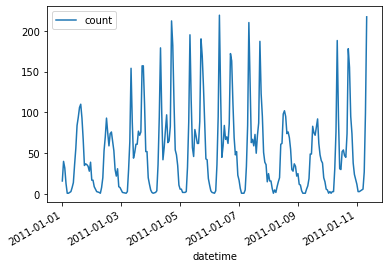

In [8]:
data[:24*10].plot(x='datetime', y='count') # 24 hours * 10 days

<div style="direction:rtl; text-align:right">

# تجهيز البيانات

<div style="direction:rtl; text-align:right">
الخطوة الأولى في تنظيف البيانات هي في تحويل البيانات الفئوية (مثل season, holiday, weather) إلى أعمدة مستقلة. نهتم كثيراً بهذه الخطوة خصوصاً في حالة النمذجة. سنستخدم الأمر get_dummies لأداء هذه المهمة.

In [9]:
season_dummies = pd.get_dummies(data['season'], prefix='season', drop_first=False)
data = pd.concat([data, season_dummies], axis=1) # axis =1 means add new columns
weather_dummies = pd.get_dummies(data['weather'], prefix='weather', drop_first=False)
data = pd.concat([data, weather_dummies], axis=1) # axis =1 means add new columns

In [10]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

cols_to_drop = ['weather','season', 'casual', 'registered']
# drop columns here

data.drop(columns=cols_to_drop, inplace=True)  # we use `inplace` to make sure the changes are perminent

<div style="direction:rtl; text-align:right">
الخطوة الثانية في تجهيز البيانات هي في تسوية البيانات (data scaling). وهذه الخطوة تهدف لتوحيد تباين البيانات. لاحظ أننا نقوم أولاً بحفظ المتوسط والانحراف المعياري، لكي نقوم باستخدامها لاحقاً لتسوية البيانات الجديدة.

In [11]:
quant_features = ['temp', 'humidity', 'windspeed'] # those are all numerical columns..
scaled_features = {}
for each in quant_features:
    print(each)
    mean, std = data[each].mean(), data[each].std()
    print(mean, std)
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
data[quant_features]

temp
20.23085981995223 7.791589843987567
humidity
61.88645967297446 19.24503327739469
windspeed
12.7993954069447 8.164537326838689


,temp,humidity,windspeed
0,-1.333599,0.993167,-1.567682
1,-1.438841,0.941206,-1.567682
2,-1.438841,0.941206,-1.567682
3,-1.333599,0.681399,-1.567682
4,-1.333599,0.681399,-1.567682
...,...,...,...
10881,-0.596908,-0.617638,1.617153
10882,-0.702149,-0.253908,0.269691
10883,-0.807391,-0.046062,0.269691
10884,-0.807391,-0.046062,-0.832404


<div style="direction:rtl; text-align:right">
حتى نتعرف على تأثير تسوية البيانات، سنقوم الآن بحساب المتوسط الحسابي والانحراف المعياري للأعمدة السابقة. ماذا تستنتج؟

In [12]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

for col in quant_features:
    mean = data[col].mean()
    std  = data[col].std()
    print('mean of {} is {} and the standard deviation is {}'.format(col, mean, std))
    
# note that all means are zero and standard deviations are 1's -- this is called z-score transformation (just substract the mean from each number and then divide by the std)

mean of temp is 2.4019816898743054e-16 and the standard deviation is 1.0
mean of humidity is 1.0443398651627414e-16 and the standard deviation is 1.0
mean of windspeed is -6.266039190976448e-17 and the standard deviation is 1.0000000000000002


In [13]:
data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,-1.333599,14.395,0.993167,-1.567682,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,-1.438841,13.635,0.941206,-1.567682,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,-1.438841,13.635,0.941206,-1.567682,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,-1.333599,14.395,0.681399,-1.567682,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,-1.333599,14.395,0.681399,-1.567682,1,1,0,0,0,1,0,0,0


<div style="direction:rtl; text-align:right">
أخيرا، الخطوة الثالثة هي في استخراج البيانات التاريخية مثل الساعة واليوم والشهر والسنة. كل هذا ممكن باستخدام أوامر مكتبة الباندا.

In [14]:
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month

<div style="direction:rtl; text-align:right">
ثم نقوم بحذف العمود الأصلي للوقت والتاريخ بعد استخراج المعلومات المفيدة منه.

In [15]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

col_to_delete = ['datetime']
# DELETE COLUMN NOW
data.drop(columns=col_to_delete, inplace=True)

In [16]:
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month
0,0,0,-1.333599,14.395,0.993167,-1.567682,16,1,0,0,0,1,0,0,0,0,1,1
1,0,0,-1.438841,13.635,0.941206,-1.567682,40,1,0,0,0,1,0,0,0,1,1,1
2,0,0,-1.438841,13.635,0.941206,-1.567682,32,1,0,0,0,1,0,0,0,2,1,1
3,0,0,-1.333599,14.395,0.681399,-1.567682,13,1,0,0,0,1,0,0,0,3,1,1
4,0,0,-1.333599,14.395,0.681399,-1.567682,1,1,0,0,0,1,0,0,0,4,1,1


<div style="direction:rtl; text-align:right">
سنقوم الآن بإعداد رسوم بيانية بسيطة لمتوسط عدد مرات الإيجار بالساعة وبالشهر. لإعداد هذه الرسوم، سنقوم أولاً بتلخيص البيانات باستخدام groupby ومن ثم رسم البيانات باستخدام plot:

In [17]:
count_per_hour = data.groupby('hour')['count'].mean()

In [18]:
count_per_hour.head()

hour
0    55.138462
1    33.859031
2    22.899554
3    11.757506
4     6.407240
Name: count, dtype: float64

<AxesSubplot:xlabel='hour'>

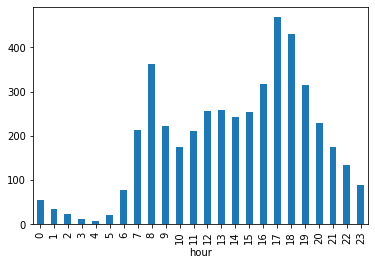

In [19]:
count_per_hour.plot(kind='bar')

#or..
#count_per_hour.plot.bar()

<div style="direction:rtl; text-align:right">
سنقوم الآن برسم مرات الإيجار حسب الشهر (month).

<AxesSubplot:xlabel='month'>

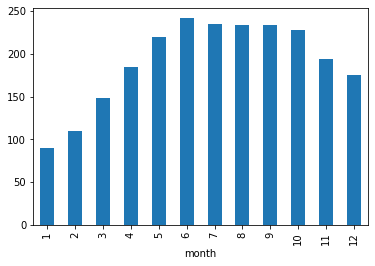

In [20]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

count_per_month = data.groupby('month')['count'].mean()
count_per_month.plot(kind='bar')

<div style="direction:rtl; text-align:right">

# نمذجة البيانات

<div style="direction:rtl; text-align:right">
سنقوم الآن بأول محاولة لنمذجة البيانات باستخدام ما يعرف بالانحدار الخطي (Linear Regression). ولكن قبل ذلك، سنقوم بتقسيم البيانات إلى بيانات للتدريب وبيانات للاختبار ومن ثم نمذجة البيانات واستخدام النموذج لتوقع مقدار الطلب على استئجار الدرجات الهوائية في بيانات جديدة ومن ثم تسليم التوقعات إلى موقع كاقل.

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

<div style="direction:rtl; text-align:right">
أسهل وأسرع طريقة لمعرفة أداء النموذج هي باستخدام الأمر cross_val_score حيث يقوم هذا الأمر بتقسيم البيانات إلى بيانات تدريب وبيانات اختار باستخدام التحقق المتقاطع ومن ثم إجراء النمذجة بدون أي حاجة للتدخل. بعد ذلك، سنقوم بطباعة معدل الخطأ لنعرف بشكل عام عن متوسط أداء النموذج قبل تطبيقه على بيانات جديدة. سنتعرف بشكل مفصل على أساليب التحقق من النماذج لاحقاً:

In [22]:
features = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour', 'day', 'month']

In [23]:
target = ['count']

In [24]:
scores = cross_val_score(X=data[features],
                         y=data[target].values, 
                         estimator=DecisionTreeRegressor(),
                         scoring='neg_mean_squared_error',
                         cv=5)

In [25]:
scores.mean()

-17931.715201077466

In [26]:
model = DecisionTreeRegressor()
model.fit(data[features], data[target])

DecisionTreeRegressor()

<div style="direction:rtl; text-align:right">

# تسليم المشروع

<div style="direction:rtl; text-align:right">
تسليم هذا المشروع على مرحلتين: الأولى هي في تسليم الملف إلى موقع كاقل ومن ثم مشاركة الرابط، والمرحلة الثانية هي باستكمال الخانات التي تحتاج إلى إكمال ومن ثم تسليم المشروع إلى الموقع.

<div style="direction:rtl; text-align:right">
في كاقل، ستأتينا بيانات الاختبار، وهو جدول آخر فيه كل الأعمدة ما عدا عدد مرات الإيجار. ومهمتنا هي في استخدام بيانات التدريب لتوقع بيانات الاختبار، ومن ثم تسليم الحل إلى موقع كاقل لنرى كيف كان الأداء. لفعل ذلك، سنقوم بالتأكد من أننا نفذها جميع الخطوات السابقة في بيانات الاختبار كذلك.

In [28]:
test = pd.read_csv('bike-sharing-demand/test.csv')
test['datetime'] = pd.to_datetime(test['datetime'])
season_dummies = pd.get_dummies(test['season'], prefix='season', drop_first=False)
test = pd.concat([test, season_dummies], axis=1) # axis =1 means add new columns
weather_dummies = pd.get_dummies(test['weather'], prefix='weather', drop_first=False)
test = pd.concat([test, weather_dummies], axis=1) # axis =1 means add new columns
for each in quant_features:
    data.loc[:, each] = (data[each] - scaled_features[each][0]) / scaled_features[each][1]
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

<div style="direction:rtl; text-align:right">
وهنا سنقوم باستخدام النموذج السابق لتوقع مرات الإيجار في بيانات الاختبار:

In [29]:
predictions = model.predict(test[features])

In [30]:
test['count'] = predictions

In [31]:
test[['datetime', 'count']].head()

,datetime,count
0,2011-01-20 00:00:00,6.0
1,2011-01-20 01:00:00,3.0
2,2011-01-20 02:00:00,7.0
3,2011-01-20 03:00:00,1.0
4,2011-01-20 04:00:00,1.0


<div style="direction:rtl; text-align:right">
الآن سنقوم بكتابة الملف حتى نقوم بتسليمها إلى كاقل. بعد كتابة الملف، اذهب إلى المسابقة في موقع كاقل، وسلم هذا الملف.

In [ ]:
test[['datetime', 'count']].to_csv('submission.csv', index=False)

<div style="direction:rtl; text-align:right">
في نهاية هذا المشروع، نتمنى أن تكون لدينا فكرة أوضح عما نفعله في علم البيانات: قراءة البيانات ثم تنظيف البيانات، ثم إجراء الاكتشاف الأولي للبيانات وبعد ذلك نقوم بنمذجة البيانات وتقييم النموذج. سنتعلم لاحقاً المزيد عن كل من هذه الخطوات.

<div style="direction:rtl; text-align:right">
إذا لم تكن راضيا عن أداء هذا النموذج، ندعوك إلى إلقاء نظرة على موقع كاقل والتعرف على الطرق المختلفة لتنظيف البيانات ورسم البيانات:

- https://www.kaggle.com/c/bike-sharing-demand/kernels